# PDS: Assignment 1

### Deadline: April 18 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_1.ipynb (ex. Bill_Gates_1905_Assignment_1.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 50%.

## Q1 (20%)
Prove the Bias-Variance tradeoff decomposition, where MSE can be written as a sum of Variance of the estimator, Bias (squared) of the estimator and an irreducible error. 

E[(fk(x) − E(fk(x)))(f(x) − E(fk(x))] = E[fk(x) − E(fk(x))](f(x) − E(fk(x))) = 0


E[(f(x) − fk(x))^2] = MSE(fk(x)) = Var(fk(x)) + Bias^2(fk(x))


E[(Y − fk(x))^2] = E[(f(x) + ϵ − fk(x))^2]

             MSE = E[(f(x) − fk(x))^2] + 2E[(f(x) − fk(x))ϵ] + E[ϵ^2]

             MSE = E[(f(x) − E(fk(x)) + E(fk(x)) − fk(x))^2] + 2E[(f(x) − fk(x))ϵ] + σ^2 
             
             MSE = Var(fk(x)) + Bias^2(fk(x)) + σ^2.

## Q2 (30%)
- read netflix data: 0%
- find ratios of Movies and TV Shows for different countries: 10%
- plot histogram of average duration length for movies with following genres: "dramas", "comedies", "sports movies" (for this case use only first genre): 10%
- create pivot table with count of word "love" in description for different genres (for this case use only first genre): 10%

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.dates as mdates

In [2]:
#Q2 - find ratios of Movies and TV Shows for different countries
df = pd.read_csv('netflix_titles.csv')

df1 = df[['type', 'country']]
df1['country'] = df1['country'].str.split(', ').str[0]

df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv[['type', 'country']].groupby('country', as_index = False).count()
df_mov = df1[df1['type'] == 'Movie']
df_mov = df_mov[['type', 'country']].groupby('country', as_index = False).count()

df1 = df_tv.merge(df_mov, how='right', on = 'country')
df1.fillna(0, inplace = True)
df1.rename(columns = {'type_x' : 'movie', 'type_y' : 'tv_shows'}, inplace = True)
df1['tv_shows'] = df1.tv_shows.astype('int')
df1['rat'] = round(df1['movie']/df1['tv_shows'], 1) 
df1['rat'] = '1 : ' + df1['rat'].astype(str)
df1 = df1[['country', 'tv_shows', 'movie', 'rat']]
df1.loc[df1.rat.str.contains('inf'), 'ratio'] = '1 : 0'
df1.head(7)

<ipython-input-2-b389d13094fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country'] = df1['country'].str.split(', ').str[0]


,country,tv_shows,movie,rat,ratio
0,Argentina,50,18.0,1 : 0.4,NaN
1,Australia,56,52.0,1 : 0.9,NaN
2,Austria,7,1.0,1 : 0.1,NaN
3,Bangladesh,2,0.0,1 : 0.0,NaN
4,Belgium,6,8.0,1 : 1.3,NaN
5,Brazil,52,27.0,1 : 0.5,NaN
6,Bulgaria,5,0.0,1 : 0.0,NaN


<AxesSubplot:xlabel='genre', ylabel='dur'>

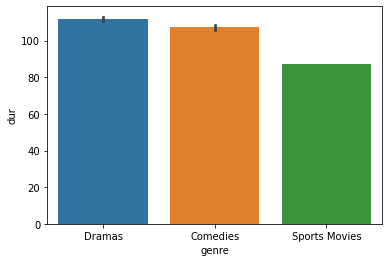

In [3]:
#Q2 - plot histogram of average duration length for movies with following genres: "dramas", "comedies", "sports movies"
df2 = df.copy()
df2['genre'] = df2['listed_in'].str.split(',').str[0]
df2 = df2[df2['duration'].str.contains(' min')]
df2['dur'] = df2.duration.str.split(' ').str[0].astype(int)
df2 = df2[(df2['genre'] == 'Dramas') | (df2['genre'] == 'Comedies') | (df2['genre'] == 'Sports Movies')]

sns.barplot(x='genre', y='dur', data=df2)

In [4]:
#Q2 - create pivot table with count of word "love" in description for different genres
df['listed_in'] = df['listed_in'].str.split(', ').str[0]

df3 = df[(df['description'].str.contains('love'))] 
df3 = df3[['listed_in', 'description']].groupby('listed_in', as_index = False).count()
pd.pivot_table(df3, index = 'listed_in', values = 'description').sort_values(
    by = 'description', ascending = False)

,description
listed_in,
Dramas,164
International TV Shows,124
Comedies,121
Action & Adventure,39
Children & Family Movies,23
Stand-Up Comedy,18
Kids' TV,15
Documentaries,14
Crime TV Shows,14


## Q3 (20%)
Read "tidy_data.xlsx" and make it in Tidy Data Format. Plot scatterplots for each persons test results. 

_There should be 6 different scatterplots for each person_

_In every scatterplot there should be 25 different colors in scatterplot for each test_

<Figure size 1296x576 with 0 Axes>

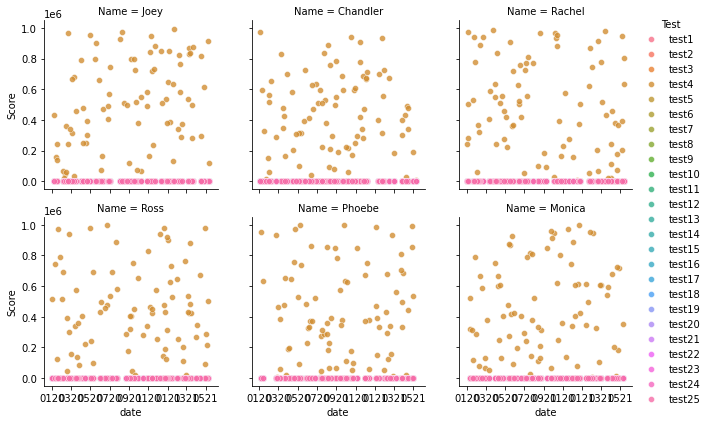

In [5]:
df = pd.read_excel('tidy_data.xlsx')
df = pd.melt(df, id_vars = ['date' ,'Name', 'Sex'], var_name= 'Test', value_name= 'Score')

plt.figure(figsize=(18, 8))
plot = sns.FacetGrid(df, col = 'Name', hue = 'Test', col_wrap = 3)
plot.map(sns.scatterplot, 'date', 'Score', alpha = 0.8)
ft = mdates.DateFormatter('%m%y')
plot.axes[0].xaxis.set_major_formatter(ft)
plot.add_legend()

## Q4 (30%)
- read "knn_bias_variance_tradeoff.csv" file: 0%
- split your data into train and test samples with test_size = 0.3: 5%
- create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- normalize (use algorithm of your choice) your entire data, and then split your data into train and test samples with test_size = 0.3: 5%
- based on normalized data create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- try to use auc metrics instead of accuracy, and then create bias variance tradeoff plot: 5%
- make conclusions of your findings (which data outputs clear bias variance tradeoff plot, which accuracy outputs clear bias variance tradeoff plot, etc.): 5%

In [6]:
#Q4 - read "knn_bias_variance_tradeoff.csv" file; split your data into train and test samples with test_size = 0.3
df = pd.read_csv('knn_bias_variance_tradeoff.csv')

y = df['TARGET CLASS']
X = df.drop(['TARGET CLASS'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)